# Diseño de una escalera usando Anastruct

In [1]:
from anastruct import SystemElements
import handcalcs.render

## Caso general: Escalera de un tramo recto

Para este primer ejemplo se propone el cálculo de una escalera sencilla de un solo tramo. El típico caso de resolver a mano con la ecuación:

$$
M_d = \frac{qL^2}{8}
$$

Los datos requeridos para el análisis son:

- $L$ : Largo en planta
- $b$ : Ámbito de la escalera
- $e$ : Espesor

Asumimos:

- $\gamma_{HA} = 25 kN/m^3$
- $Peldañeado: 200 kg/m^2$
- $SCU: 300 kg/m^2$

In [2]:
%%render params
# Introduce Longitud (L [m]):
L = 3.75

# Introduce ámbito de la escalera (b [m]):
b = 1.25

# Introduce espesor (e [m]):
e = 0.15

# Datos asumidos:
gamma_HA = 2400
peldano = 200
SCU = 300

<IPython.core.display.Latex object>

In [3]:
%%render
q = gamma_HA * e + peldano + SCU

<IPython.core.display.Latex object>

# Modelado con Anastruct

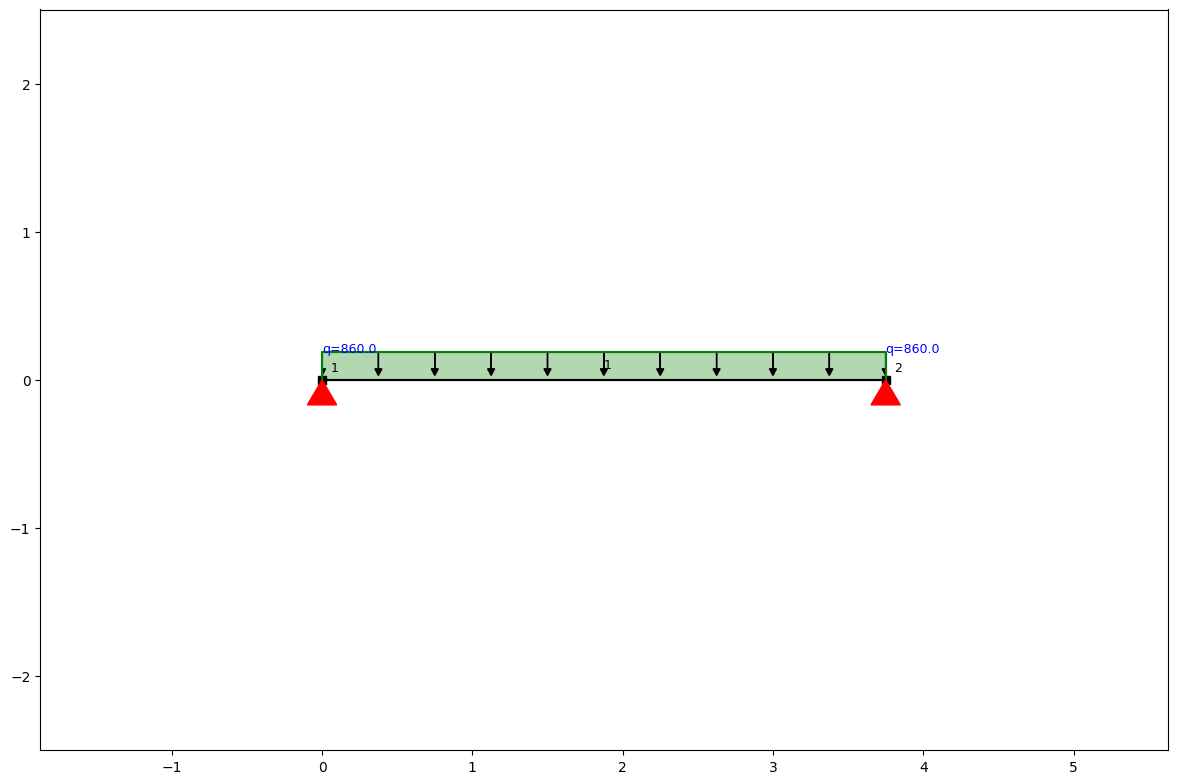

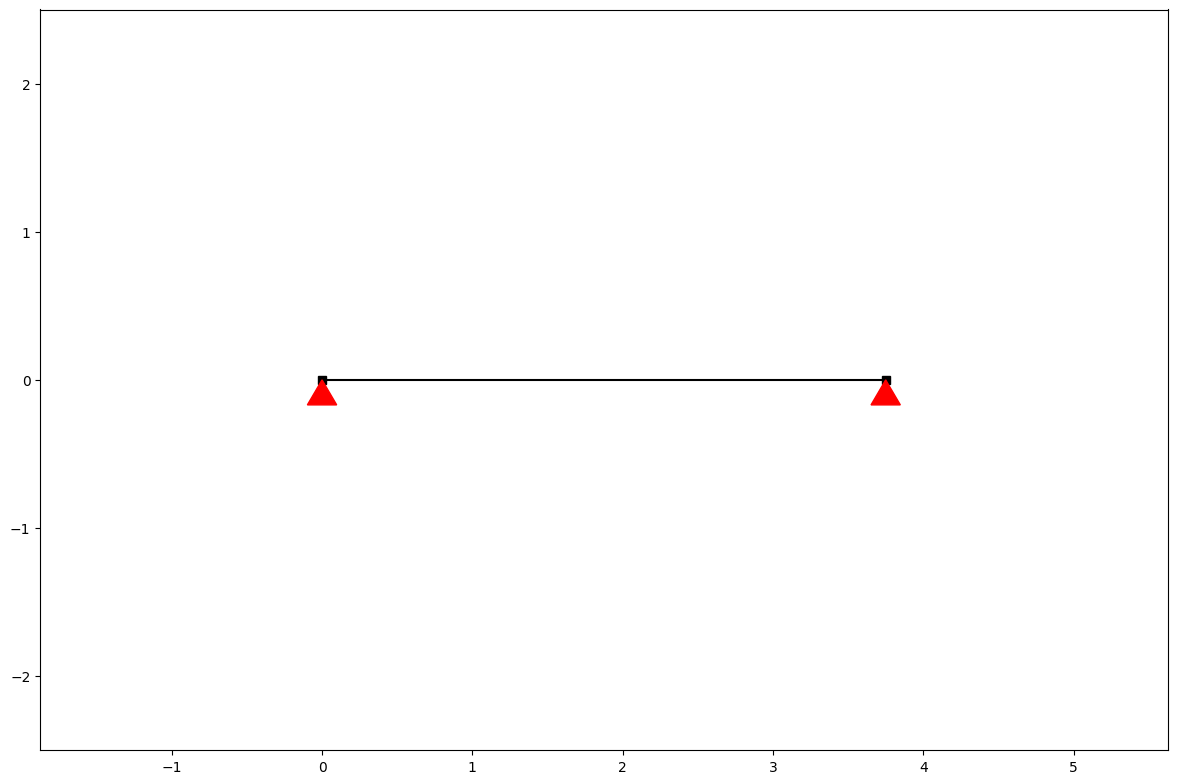

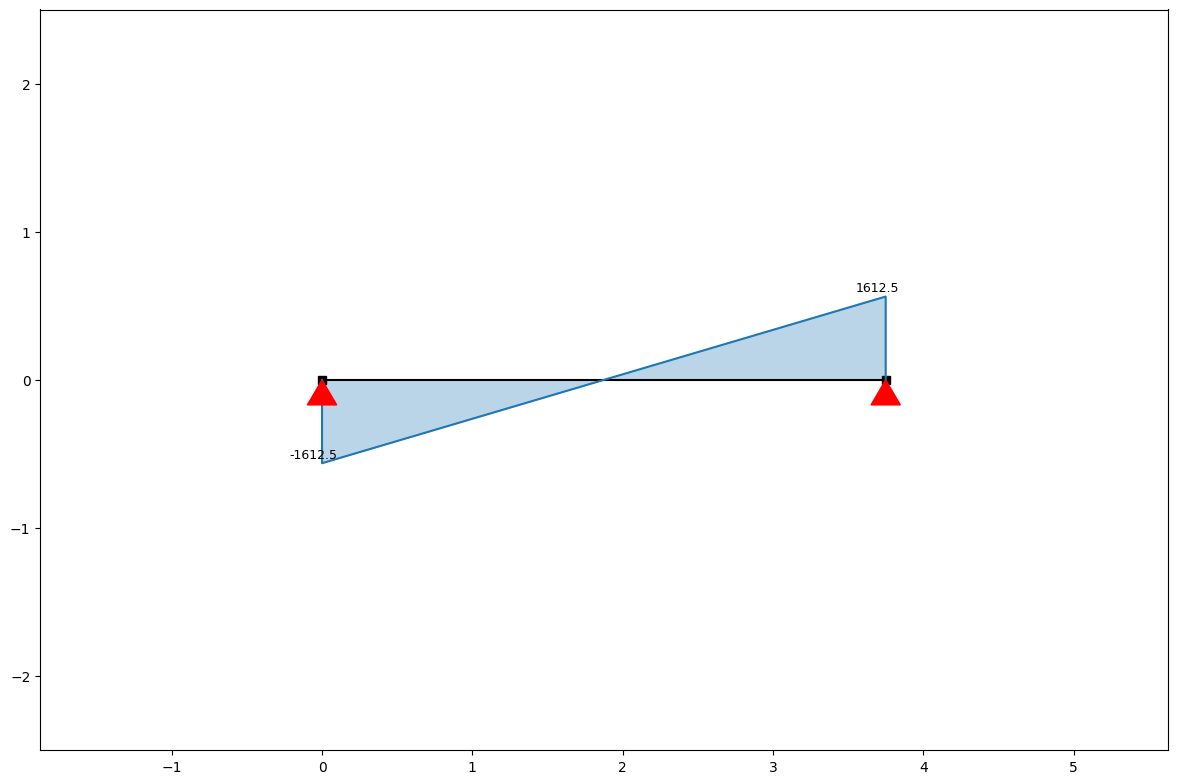

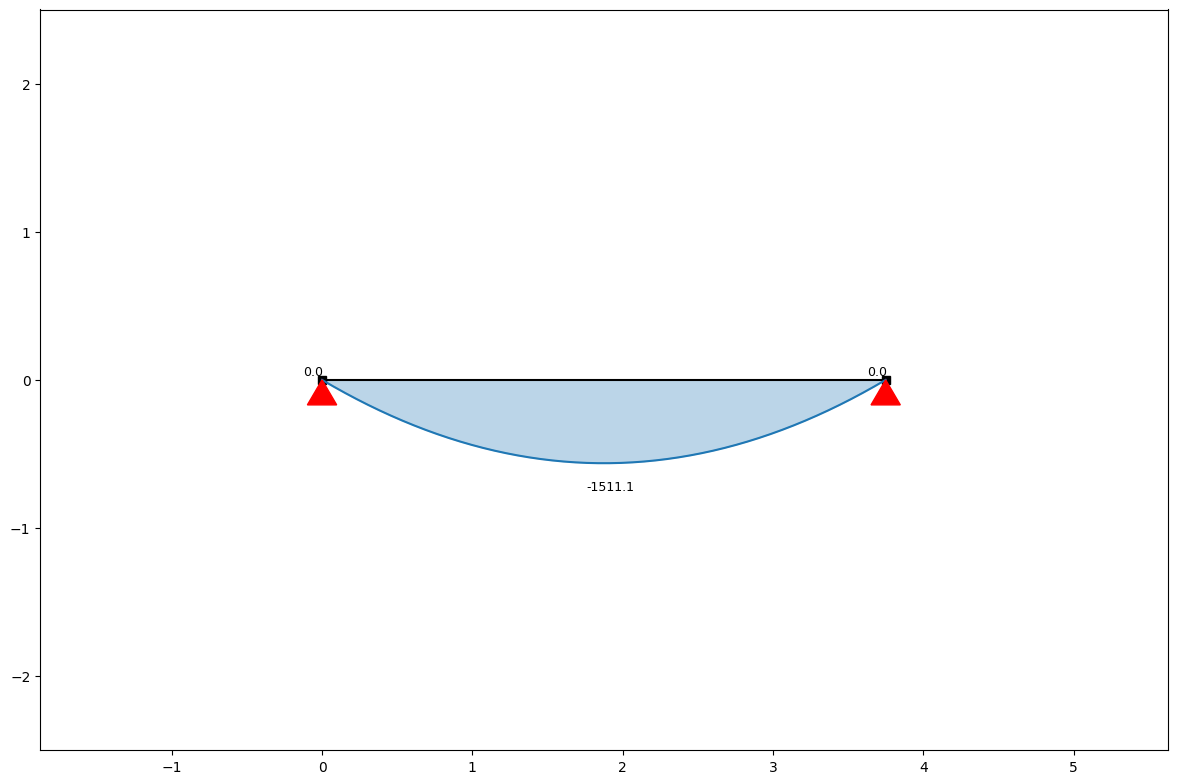

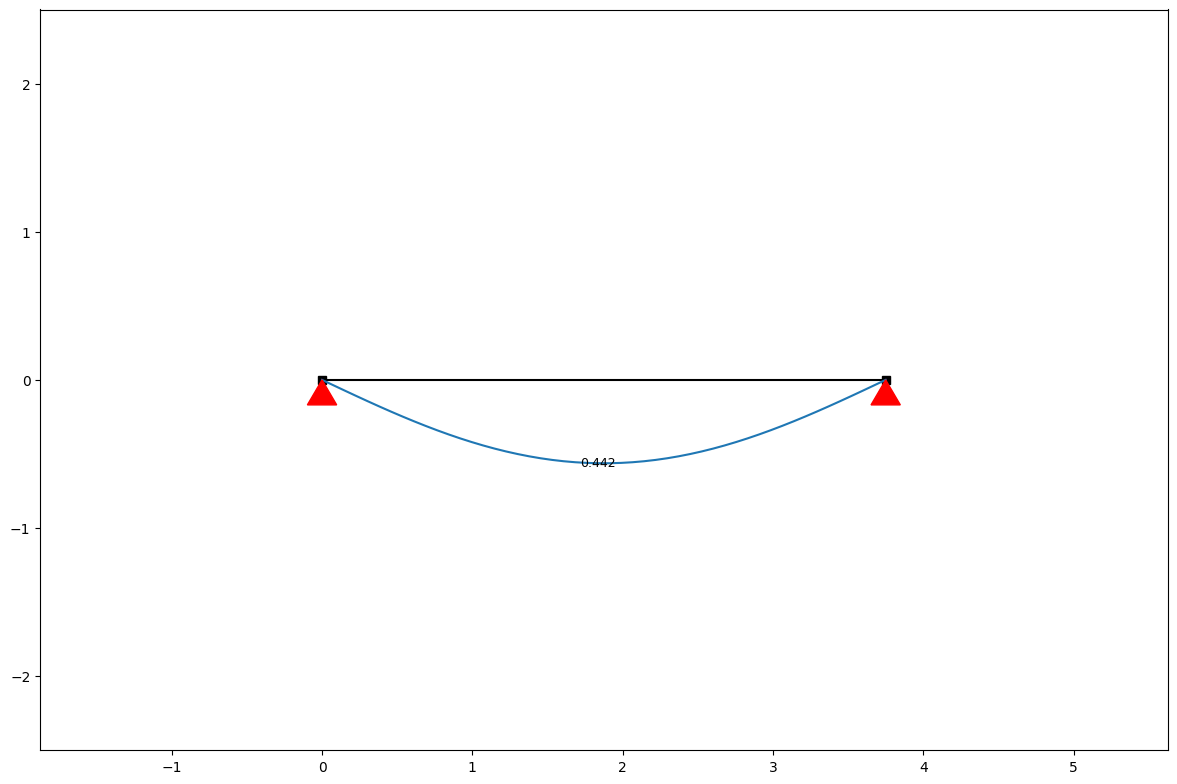

In [4]:
# Crea el objeto del sistema:
ss = SystemElements()

# Modela la escalera:
ss.add_element(location=[
    [0,0], [L,0]])

# Añade los soportes:
ss.add_support_hinged(node_id=1)
ss.add_support_hinged(node_id=2)

# Añade la carga:
ss.q_load(element_id=1, q=-q)
ss.solve()

# Muestra la estructura:
ss.show_structure()
ss.show_axial_force()
ss.show_shear_force()
ss.show_bending_moment()
ss.show_displacement()


In [5]:
M_d = ss.get_element_results(element_id=1)["Mmin"]

In [6]:
%%render
M_d

<IPython.core.display.Latex object>